Importing all the necessary libraries

In [68]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tsfel as ts

In [69]:
#main_directory = r"C:\Users\chode\Downloads\Data"
#os.chdir(main_directory)

Loading all the data created after preprocessing from the code provided

In [70]:
X_test = np.load("X_test.npy")
X_train = np.load("X_train.npy")
y_test = np.load("y_test.npy")
y_train = np.load("y_train.npy")
y_val = np.load("y_val.npy")
X_val = np.load("X_val.npy")

In [71]:
X_train.shape

(108, 500, 3)

Creating the 3D nummpy array to 2D nummpy array after calculating total acceleration 

In [72]:
X_train_new = np.sum(X_train**2, axis=2)
X_test_new = np.sum(X_test**2, axis=2)

X_train_new_subplot(X_train_new.shape)
print(X_test_new.shape)

(36, 500)


Finding the samples corresponding to various activities to plot

In [73]:
index = np.where(y_train == 1)[0][0]
index

6

Creating "X_train_new_subplot" array containing 6 samples corresponding to 6 different activities

In [74]:
indices = [6,2,3,5,0,4]    # each index the first position of i_th activity     {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

X_train_new_subplot = X_train_new[indices, :]
X_train_new_subplot.shape

(6, 500)

## Question 1

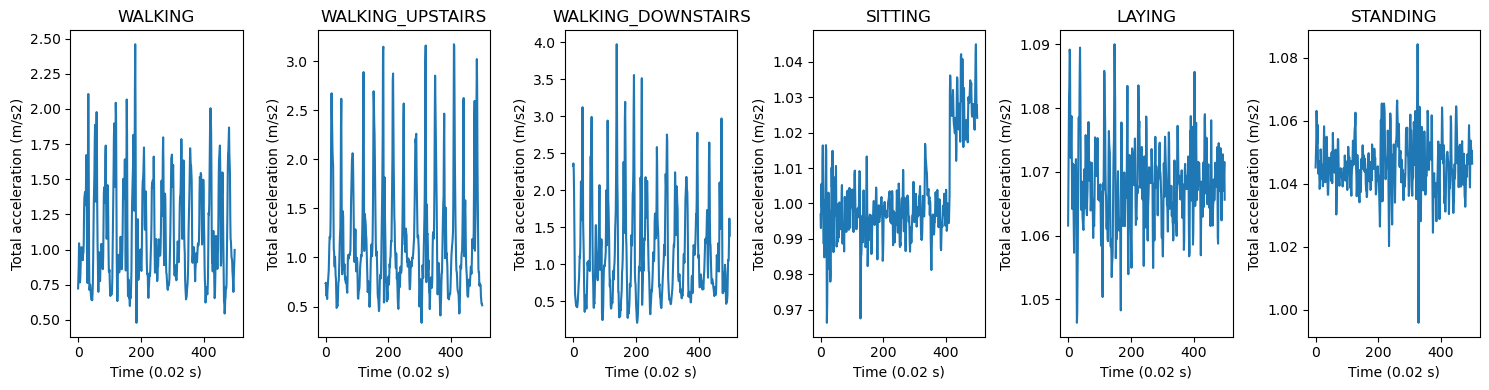

In [75]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15, 4))
class_names=["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","LAYING","STANDING"]
for i in range(6):
    axes[i].plot(X_train_new_subplot[i, :])
    axes[i].set_title(class_names[i])
    axes[i].set_xlabel("Time (0.02 s)")
    axes[i].set_ylabel("Total acceleration (m/s2)")

plt.tight_layout()
plt.show()

## Question 2 (and Question 1 subjective answer)

Based on the above plots, we can say that a Decision tree model will be able to classify the activities using the given data. This is because there's a significant difference in the amplitudes of the linear acceleration of the static activities namely laying, sitting, standing and the dynamic activities namely walking, walking_downstairs, walking_upstairs.

Hence, we can train a Decision tree to differentiate these activites and such models may be used in Smart watches as well as other technologies to detect movement of the user with the help of accelerometer data.

## Question 3

Training Decision Tree on the X_train_new training dataset and X_test_new as testing data set

Testset Accuracy: 0.4722


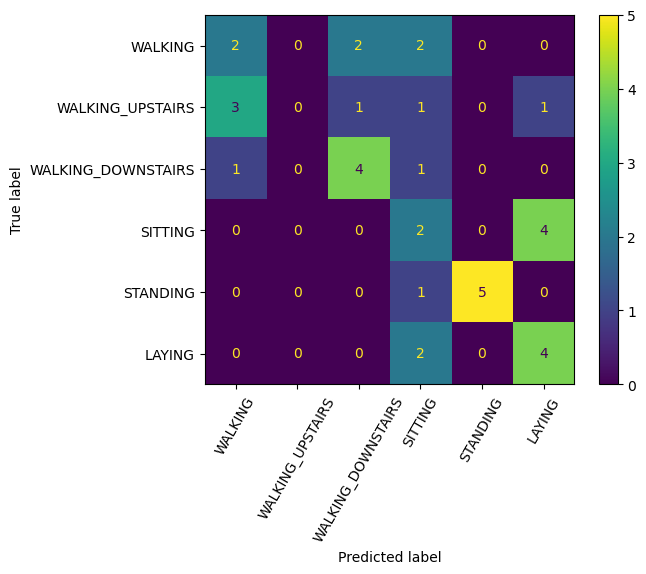

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing, feature_selection
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

def fit_and_evaluate_tree(X_train, y_train, X_test, y_test,depth=0):       # if depth is not specified, no parameter will be passed to DecisionTreeClassifer function
    if depth>0:
        model = DecisionTreeClassifier(max_depth=depth)
    else:
        model = DecisionTreeClassifier()

    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    if depth>0:
        print(f"Testset Accuracy for depth {depth}: {accuracy:.4f}")
    else:
        print(f"Testset Accuracy: {accuracy:.4f}")

    return round(accuracy, ndigits= 4), cm
        
acc, cm1 = fit_and_evaluate_tree(X_train_new, y_train, X_test_new, y_test)
cm1_display = ConfusionMatrixDisplay(cm1, display_labels=["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"]).plot(values_format='d', ax=plt.gca(), xticks_rotation=60)

## Question 4

Training Decision Tree for Depth range 2-8

In [77]:
accuracy_dic = {}
cm = {}
for depth in range(2, 9):
    accuracy_dic[depth], cm[depth] = fit_and_evaluate_tree(X_train_new, y_train, X_test_new, y_test, depth)
    

Testset Accuracy for depth 2: 0.4444
Testset Accuracy for depth 3: 0.5833
Testset Accuracy for depth 4: 0.5000
Testset Accuracy for depth 5: 0.4722
Testset Accuracy for depth 6: 0.5278
Testset Accuracy for depth 7: 0.5833
Testset Accuracy for depth 8: 0.6111


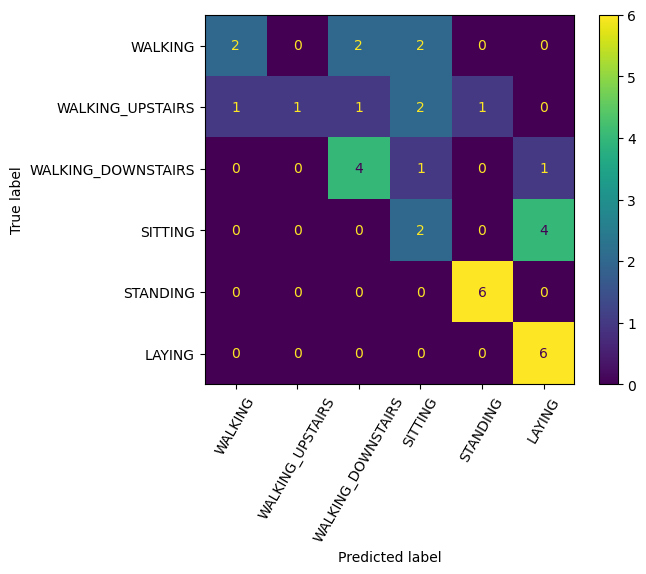

In [78]:
#We can find Confusion matrix for any depth
depth = 3
ConfusionMatrixDisplay(cm[depth], display_labels=["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"]).plot(values_format='d', ax=plt.gca(), xticks_rotation= 60)

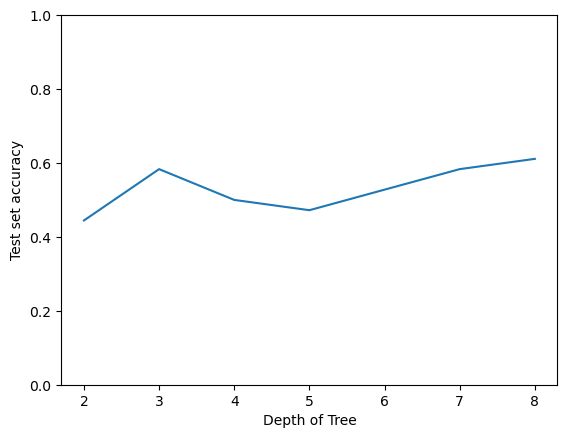

In [79]:
accuracy_dic
plt.plot(accuracy_dic.keys(),accuracy_dic.values(), scaley=False)
plt.xlabel("Depth of Tree")
plt.ylabel("Test set accuracy")
plt.show()

We see that the accuracy increases from depth 2 to 3 but then hovers between 0.44 to 0.55 which indicates to no clear accuracy increase depth 3 onwards.

## Question 5

In [80]:
#Applying PCA on raw X_train_new data 
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_train_new)
print("Variance ratio of 2 features: ",sum(pca.explained_variance_ratio_))
X_train_reduced = pca.transform(X_train_new)


Variance ratio of 2 features:  0.20342134219602973


In [81]:
X_train_reduced.shape

(108, 2)

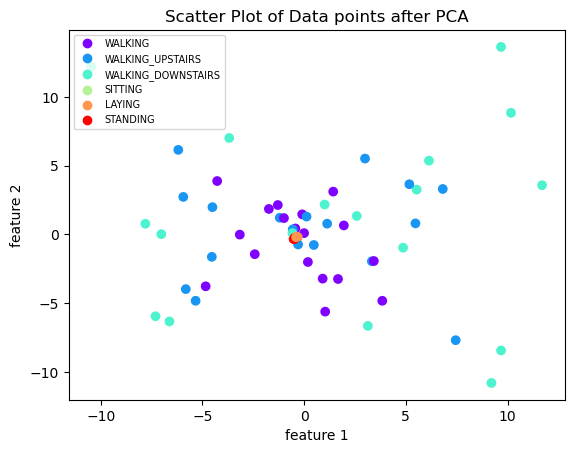

In [82]:
sc1 = plt.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], c=y_train, cmap='rainbow')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title("Scatter Plot of Data points after PCA")
plt.legend(handles= sc1.legend_elements()[0], labels=class_names, loc = 'upper left', fontsize=7)
plt.show()



We can see that on applying PCA on the raw X_train_new dataset, we get that the variance captured by the 2 resulting features in only 23%, and from the scatter plot as well, we can see that it is very difficult to classify the points.

#### Now, applying featurization to the data and then applying PCA

In [83]:
features = ts.get_features_by_domain('statistical')
X_train_new_ts = ts.time_series_features_extractor(features,X_train_new.T, fs=50)
X_test_new_ts = ts.time_series_features_extractor(features,X_test_new.T, fs=50)                  # x_train_new_ts (also test) is a Pandas dataframe.

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***


In [84]:
print(X_train_new_ts.shape)
print(X_test_new_ts.shape)

(1, 4320)
(1, 1440)


We will make a list feature_list which contains the name of all statistical features like Mean, Max, SD and others.

In [85]:
l1 = list(X_train_new_ts.iloc[0,:40].keys())
feature_list = []
for i in l1:
    b = i[1:]
    feature_list.append(b)

In [86]:
X_trainf_ts = [[] for i in range(108)]
for feature in feature_list:
    a = []
    for i in range(108):
        s = str(i)+ str(feature)
        a.append([X_train_new_ts.iloc[0,:].loc[s]])

    X_trainf_ts = np.hstack((X_trainf_ts,a))

In [87]:
X_test_new_ts.iloc[0,:][:5]

0_Absolute energy            1033.973888
0_Average power               103.604598
0_ECDF Percentile Count_0     100.000000
0_ECDF Percentile Count_1     400.000000
0_ECDF Percentile_0             0.637482
Name: 0, dtype: float64

In [88]:
X_testf_ts = [[] for i in range(36)]
for feature in feature_list:
    a = []
    for i in range(36):
        s = str(i)+ str(feature)
        a.append([X_test_new_ts.iloc[0,:].loc[s]])

    X_testf_ts = np.hstack((X_testf_ts,a))           # we get a numpy array of 40 features

In [89]:
X_testf_ts.shape

(36, 40)

In [90]:
pca1 = PCA(n_components=2)
pca1.fit(X_trainf_ts)
print(sum(pca1.explained_variance_ratio_))
X_train_reduced_ts = pca1.transform(X_trainf_ts)

0.9793879036289961


Earlier scatter plot repeated below for comparison.

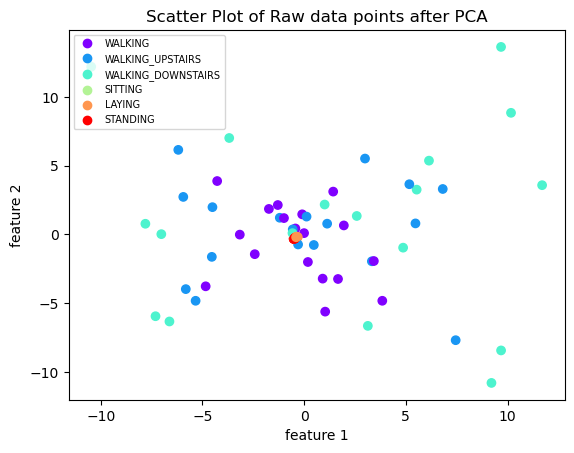

In [91]:
sc1 = plt.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], c=y_train, cmap='rainbow')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title("Scatter Plot of Raw data points after PCA")
plt.legend(handles= sc1.legend_elements()[0], labels=class_names, loc = 'upper left', fontsize=7)

plt.show()



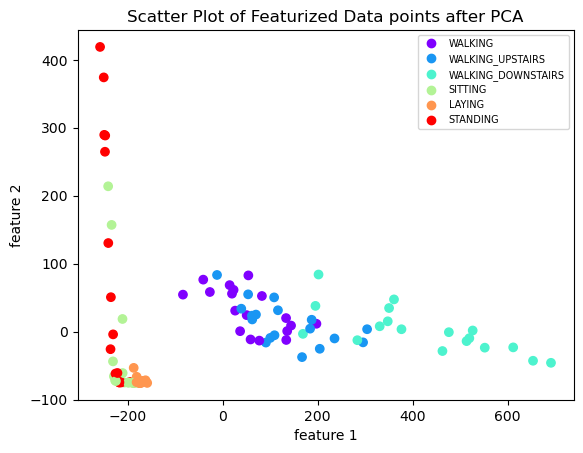

In [92]:
sc2 = plt.scatter(X_train_reduced_ts[:, 0], X_train_reduced_ts[:, 1], c=y_train, cmap='rainbow')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend(handles= sc2.legend_elements()[0], labels=class_names, loc = 'upper right', fontsize=7)
plt.title("Scatter Plot of Featurized Data points after PCA")
plt.show()

Here we can see the different clusters for Dynamic and Static activities. Therefore we can do better clasification than applying PCA on X_train_new dataset.

## Question 6

Testset Accuracy: 0.6667


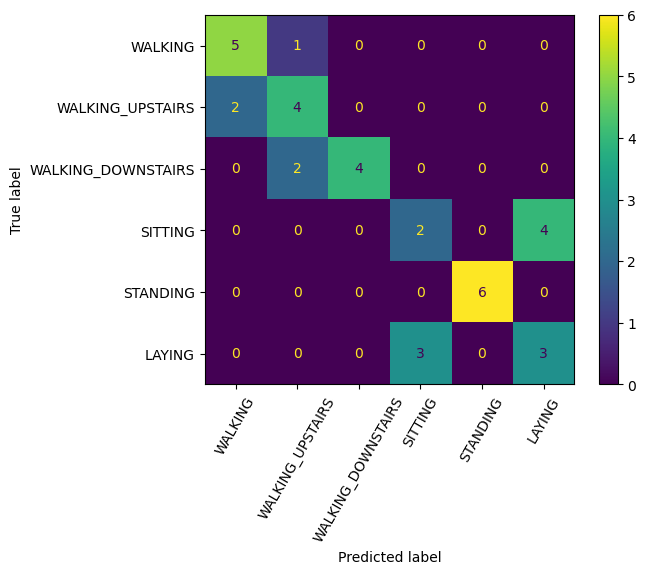

In [93]:
acc_ts, cm_ts = fit_and_evaluate_tree(X_trainf_ts, y_train, X_testf_ts, y_test)
cm_ts_display = ConfusionMatrixDisplay(cm_ts, display_labels=["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"]).plot(values_format='d', ax=plt.gca(), xticks_rotation= 60)

In [94]:
accuracy_dic_ts = {}
cm_ts1 = {}
for depth in range(2, 9):
    accuracy_dic_ts[depth], cm_ts1[depth] = fit_and_evaluate_tree(X_trainf_ts, y_train, X_testf_ts, y_test, depth)

Testset Accuracy for depth 2: 0.6111
Testset Accuracy for depth 3: 0.6389
Testset Accuracy for depth 4: 0.6944
Testset Accuracy for depth 5: 0.6667
Testset Accuracy for depth 6: 0.6389
Testset Accuracy for depth 7: 0.6944
Testset Accuracy for depth 8: 0.6944


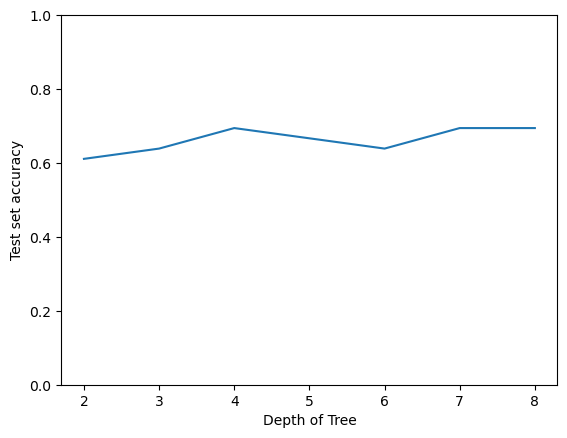

In [95]:
accuracy_dic_ts
plt.plot(accuracy_dic_ts.keys(),accuracy_dic_ts.values(), scaley=False)
plt.xlabel("Depth of Tree")
plt.ylabel("Test set accuracy")
plt.show()

Does featurizing works better than using the raw data?

Yes, clearly using featurizing gives us better accuracy. 

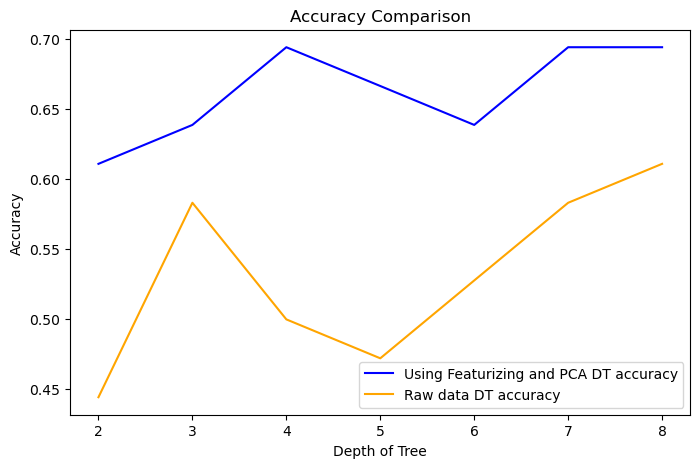

In [96]:
#Compairing the accuracies 
keys_ts = accuracy_dic_ts.keys()
values_ts = accuracy_dic_ts.values()

keys = accuracy_dic.keys()
values = accuracy_dic.values()

plt.figure(figsize=(8, 5))
plt.plot(keys_ts, values_ts, label="Using Featurizing and PCA DT accuracy", color="blue")
plt.plot(keys, values, label="Raw data DT accuracy", color="orange")

plt.xlabel("Depth of Tree")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison")

plt.legend()
plt.show()


## Question 7

When Decision tree model was trained on raw data, the Static activites were being confused only for themsevles or other static activities while the Dynamic activities were classified for static activities as well. So, we can say that the model performed worse on dynamic activities. 
The reason could be that due to the dataset containing 500 features and each dynamic activity data point showing huge variation in Total acceleration, focussing on features with Total_acc values closer to 1, could lead to dynamic activities being classified for static ones.


When the Decision tree model was instead trained on featurised data, each data point had various statistics of the *entire timeframe* as features, like Max, min and mean. This led it to perform better on both Static and Dynamic activities with confusion happening only amongst the 2 groups (ie no static activity marked as dynamic and vice versa).

# Deployment

In [97]:
new_directory = r"C:\Users\chode\Downloads"
os.chdir(new_directory)
df_X = pd.read_csv(os.path.join(new_directory,"X_dep.csv"),sep=",", header=None)
df_y = pd.read_csv(os.path.join(new_directory,"y_dep.csv"),sep=",", header=None)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\chode\\Downloads'

In [ ]:
df_X.shape

In [ ]:
df_y.iloc[:,0]

In [ ]:
df_X.shape

In [ ]:
X_dep = []
[X_dep.append(df_X.iloc[i,:]) for i in range(18)]
X_dep = np.array(X_dep)

y_dep = [i for i in df_y[0]]
y_dep = np.array(y_dep)

We now combine the train and test data of UCI HAR to use for training our decision model.

In [ ]:
X = np.concatenate((X_test_new, X_train_new), axis = 0)
y = np.concatenate((y_test, y_train), axis = 0)

In [ ]:
acc_dep, cm_dep = fit_and_evaluate_tree(X,y, X_dep, y_dep)
acc_dep
cmdep_display = ConfusionMatrixDisplay(cm_dep, display_labels=["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"]).plot(values_format='d', ax=plt.gca(), xticks_rotation=60)


The accuracy is very low because decision tree classification is not good with time series data. If the test data is slightly shifted, then same activity may not be classified to true label by the decision tree. 

### Tried to use Featurization to improve accuracy on deployment data (Didn't Improve)

In [ ]:
features = ts.get_features_by_domain('statistical')
X_dep_ts = ts.time_series_features_extractor(features,X_dep.T, fs=50)


In [ ]:
X_dep_ts.iloc[0,:].shape

In [ ]:
feature_list[29]

In [ ]:
X_depf_ts = [[] for i in range(18)]
for feature in feature_list:
    a = []
    for i in range(18):
        s = str(i)+ str(feature)
        a.append([X_dep_ts.iloc[0,:].loc[s]])
    X_depf_ts = np.hstack((X_depf_ts,a))            # we get a numpy array of 40 features

In [ ]:
acc_dep_ts, cm_dep_ts = fit_and_evaluate_tree(X_trainf_ts,y_train, X_depf_ts, y_dep)
acc_dep_ts
cmdep_ts_display = ConfusionMatrixDisplay(cm_dep_ts, display_labels=["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"]).plot(values_format='d', ax=plt.gca(), xticks_rotation=60)
